## Imports

In [0]:
import numpy as np
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

## Preprocessing



### Load dataset

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Data normalization

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Reshaping

In [4]:
X_train = X_train.reshape(-1, 28*28)
X_train.shape

(60000, 784)

In [5]:
X_test = X_test.reshape(-1, 28*28)
X_test.shape

(10000, 784)

## Learning

### Building MLP



In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=784, ))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Train

In [7]:
history = model.fit(X_train, y_train, batch_size=100, validation_split=0.1, epochs=20)

Epoch 1/20
540/540 [==============================] - 2s 4ms/step - loss: 1.1182 - sparse_categorical_accuracy: 0.6424 - val_loss: 0.7459 - val_sparse_categorical_accuracy: 0.7520
Epoch 2/20
540/540 [==============================] - 2s 3ms/step - loss: 0.7460 - sparse_categorical_accuracy: 0.7494 - val_loss: 0.6289 - val_sparse_categorical_accuracy: 0.7867
Epoch 3/20
540/540 [==============================] - 2s 3ms/step - loss: 0.6515 - sparse_categorical_accuracy: 0.7811 - val_loss: 0.5768 - val_sparse_categorical_accuracy: 0.8023
Epoch 4/20
540/540 [==============================] - 2s 3ms/step - loss: 0.6035 - sparse_categorical_accuracy: 0.7978 - val_loss: 0.5412 - val_sparse_categorical_accuracy: 0.8178
Epoch 5/20
540/540 [==============================] - 2s 3ms/step - loss: 0.5700 - sparse_categorical_accuracy: 0.8078 - val_loss: 0.5166 - val_sparse_categorical_accuracy: 0.8205
Epoch 6/20
540/540 [==============================] - 2s 3ms/step - loss: 0.5456 - sparse_categorica

### Evaluation

In [8]:
test_loss, test_accuracy = model.evaluate(X_train, y_train, batch_size=100)
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 0s 3ms/step - loss: 0.4321 - sparse_categorical_accuracy: 0.8481


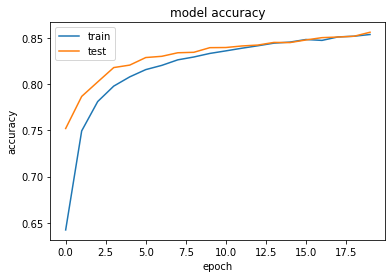

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()